## Inversion von Geoelektrik-Daten


In [115]:
import numpy as np
import scipy.special as scp

def forward_model(rho,d,L_model): 
    ''' Berechnet die scheinbaren spezifischen Widerstände für Schichten mit der
        Dicke d und spezifischen Widerständen rho für bestimmte Auslagenlängen L/2 

    © Nepomuk Boitz, Mai 2019, boitz@geophysik.fu-berlin.de
'''
    n = len(rho); 
    K = np.zeros([n]); 
    T = np.zeros([n])
    K[n-1] = 1; 
    P = np.zeros([n-1])
    rho_a = np.zeros([len(L_model)])
    dx = 0.1; 
    temp = np.zeros([n-1,len(np.arange(0,50+dx,dx))])
    a = time.time()
    for i in range(0,n-1):
        P[i] = rho[i]/rho[i+1]; 
        for idx,lamb in enumerate(np.arange(0,50+dx,dx)):
            temp[i,idx] = np.tanh(d[i]*lamb)
    b = time.time()
    print(b-a)

    vec = np.arange(n-2,-1,-1)
    count = 0; 
    for L in L_model:
        fac = 0;
        
        for idx,lamb in enumerate(np.arange(0,50+dx,dx)):
            #a = datetime.datetime.now()
            for i in vec:
                #print(i)
                #K[i] = (K[i+1]+P[i]*np.tanh(d[i]*lamb))/(P[i] + K[i+1]*np.tanh(d[i]*lamb));
                K[i] = (K[i+1]+P[i]*temp[i,idx])/(P[i] + K[i+1]*temp[i,idx]);
            
            for i in range(1):
                T[i] = rho[i]*K[i];
            
            fac = fac + (((T[0]-rho[0])*scp.jv(1,lamb*L)*lamb)*dx);
            #print(lamb,fac)
            #return t2-t1
            #b = datetime.datetime.now()
            #c = b-a
            #print(c.microseconds)
        #return fac
        fac = rho[0]+L**2*fac; 
        rho_a[count] = fac;   
        count = count+1; 

    return rho_a

0.010742902755737305
0.31963062286376953


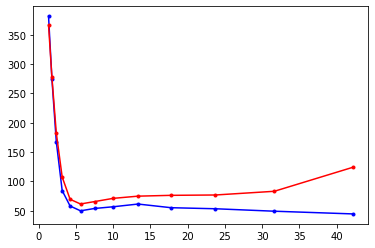

In [116]:
import matplotlib.pyplot as plt

data = np.array([[1.33,79.9890,381.69],
                 [1.78,30.0490,275.50],
                 [2.37,9.9592,167.92],
                 [3.16,2.7613,84.46],
                 [4.22,1.0549,58.19],
                 [5.62,0.5077,49.98],
                 [7.50,0.3067,53.96],
                 [10.00,0.1815,56.88],
                 [13.34,0.1102,61.52],
                 [17.78,0.0557,55.27],
                 [23.71,0.0303,53.49],
                 [31.62,0.0157,49.30],
                 [42.17,0.0080,44.69]]) 
# Startmodell
rho_start = np.array([500,20,100,50]); 
d_start = np.array([1,1,8]); 
#print(np.transpose(data[:,0]))
import datetime 
#t1 = time.time()
#for i in range(0,100000):
#    np.tanh(27)
for i in range(0,1):
    rho_a = forward_model(rho_start,d_start,np.transpose(data[:,0]));
#print(rho_a*1000)
#t2 = time.time()
print(t2-t1)
#plot(data(:,1),rho_a,'b*-') % Inversion
#plot(data(:,1),data(:,3),'r+-') % Data
plt.plot(data[:,0],data[:,2],'b.-')
plt.plot(data[:,0],rho_a,'r.-')
#print(rho_a

In [6]:
import scipy.special as scp

In [26]:
dx = 0.01
np.arange(0,50+dx,dx)

array([0.000e+00, 1.000e-02, 2.000e-02, ..., 4.998e+01, 4.999e+01,
       5.000e+01])

In [27]:
scp.jv(1,17)

-0.09766849275778067